# 同花顺理财验证

## 获取各个股票的代码

In [1]:
import tushare as ts
token = '2c5b90e9594bc441a34040e214b4e42a7da2a06c55816229981d575a'
pro = ts.pro_api(token = token)
data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
stock_code = data.ts_code

In [2]:
stock_code = stock_code.to_list()

In [67]:
stock_df = pro.daily(ts_code='000001.SZ', start_date='20180101', end_date='20210508')
stock_df = stock_df.iloc[::-1,:]
stock_df.reset_index(inplace = True, drop = True)
stock_df


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20180102,13.35,13.93,13.32,13.70,13.30,0.40,3.0100,2081592.55,2856543.822
1,000001.SZ,20180103,13.73,13.86,13.20,13.33,13.70,-0.37,-2.7000,2962498.38,4006220.766
2,000001.SZ,20180104,13.32,13.37,13.13,13.25,13.33,-0.08,-0.6000,1854509.48,2454543.516
3,000001.SZ,20180105,13.21,13.35,13.15,13.30,13.25,0.05,0.3800,1210312.72,1603289.517
4,000001.SZ,20180108,13.25,13.29,12.86,12.96,13.30,-0.34,-2.5600,2158620.81,2806099.169
...,...,...,...,...,...,...,...,...,...,...,...
806,000001.SZ,20210428,23.29,23.45,22.78,23.35,22.94,0.41,1.7873,593837.93,1375141.409
807,000001.SZ,20210429,23.34,23.71,23.11,23.59,23.35,0.24,1.0278,614836.88,1439823.965
808,000001.SZ,20210430,23.35,23.49,23.01,23.29,23.59,-0.30,-1.2717,561981.32,1308177.202
809,000001.SZ,20210506,23.10,23.70,23.10,23.50,23.29,0.21,0.9017,500295.22,1174181.608


## 想要验证一下各种K线组合到底正确率有多少，先来看看三阳开泰？

三阳开泰有如下四个形态特征。  
1．由3根连续创新高的中阳线或大阳线组成。  
2．出现在上涨行情初期。  
3．每一天的最高价都高于前一天的最高价，每一天的最低价都高于前一天最低价。  
4．每天的开盘在前一天的实体之内，也就是每根阳线的开盘价低于前一天的收盘价但高于前一天的开盘价。  

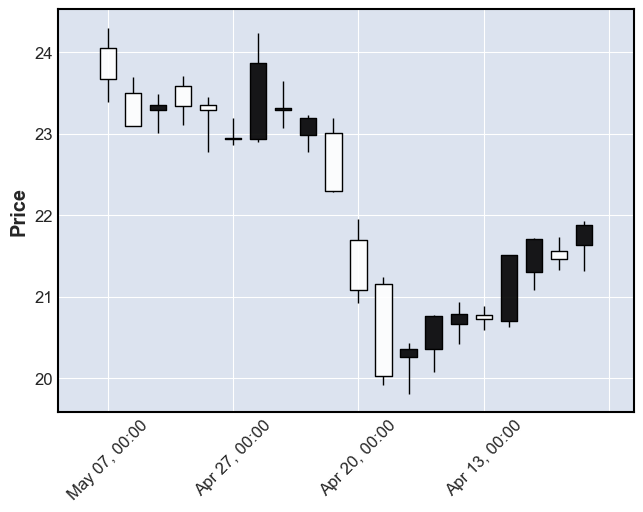

In [22]:
import mplfinance as mpf
import tushare as ts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import numpy as np

df = stock_df.iloc[:20,:]
df.index = df.trade_date
df.index.name = 'Date'
df.index = pd.DatetimeIndex(df.index)
mpf.plot(df[['open','high','low', 'close']], type = 'candle')

20190527


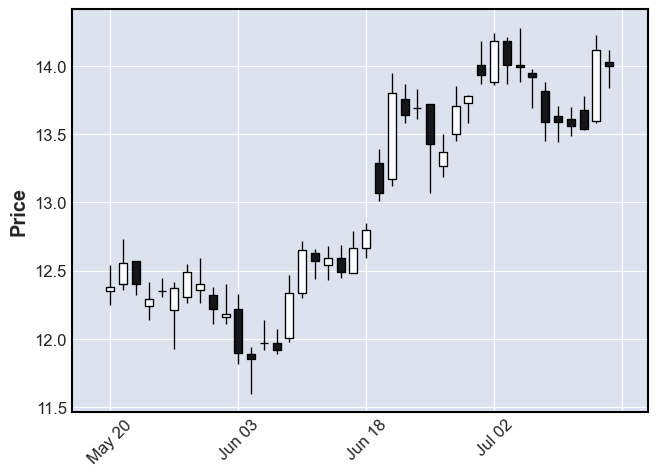

In [50]:
for i in range(stock_df.shape[0] - 3):
    if stock_df.high[i+2] >= stock_df.high[i+1] and \
       stock_df.high[i+1] >= stock_df.high[i] and \
       stock_df.low[i+2] >= stock_df.low[i+1] and \
       stock_df.low[i+1] >= stock_df.low[i] and \
       stock_df.open[i+2] <= stock_df.close[i+1] and \
       stock_df.open[i+2] >= stock_df.open[i+1] and \
       stock_df.open[i+1] <= stock_df.close[i] and \
       stock_df.open[i+1] >= stock_df.open[i] and \
       stock_df.close[i+2] >= stock_df.open[i+2] and \
       stock_df.close[i+1] >= stock_df.open[i+1] and \
       stock_df.close[i] >= stock_df.open[i] :
        min_index = max(0,i-5)
        max_index = min(stock_df.shape[0], i+35)
        print(stock_df.trade_date[i])
        df = stock_df.iloc[min_index:max_index,:]
        df.index = df.trade_date
        df.index.name = 'Date'
        df.index = pd.DatetimeIndex(df.index)
        mpf.plot(df[['open','high','low', 'close']], type = 'candle')
        break
    

得看看他对于后续多少天的上涨有多少预测能力？

In [68]:
import numpy as np
sykt_cnt = 0
following_days_list = [7,14,21,28,35]
following_days_accuracy = [0,0,0,0,0]
following_days_avg_increase = [0,0,0,0,0]
for i in range(stock_df.shape[0] - 35):
    if stock_df.high[i+2] >= stock_df.high[i+1] and \
       stock_df.high[i+1] >= stock_df.high[i] and \
       stock_df.low[i+2] >= stock_df.low[i+1] and \
       stock_df.low[i+1] >= stock_df.low[i] and \
       stock_df.open[i+2] <= stock_df.close[i+1] and \
       stock_df.open[i+2] >= stock_df.open[i+1] and \
       stock_df.open[i+1] <= stock_df.close[i] and \
       stock_df.open[i+1] >= stock_df.open[i] and \
       stock_df.close[i+2] >= stock_df.open[i+2] and \
       stock_df.close[i+1] >= stock_df.open[i+1] and \
       stock_df.close[i] >= stock_df.open[i] :
        min_index = max(0,i-5)
        max_index = min(stock_df.shape[0], i+35)
        #print(stock_df.trade_date[i])
        df = stock_df.iloc[i:max_index,:]
        df.index = df.trade_date
        df.index.name = 'Date'
        df.index = pd.DatetimeIndex(df.index)
        #mpf.plot(df[['open','high','low', 'close']], type = 'candle')
        #break
        
        sykt_cnt += 1
        
        
        
        for j in range(5):
            following_days = following_days_list[j]
            #print(stock_df.close[i + following_days] , stock_df.close[i])
            following_days_avg_increase[j] += stock_df.close[i + following_days] - stock_df.close[i]
            if stock_df.close[i + following_days] > stock_df.close[i]:
                following_days_accuracy[j] +=1
                
following_days_accuracy = [item/sykt_cnt for item in following_days_accuracy]         
following_days_avg_increase = [item/sykt_cnt for item in following_days_avg_increase]

print(f"{stock_df.shape[0]}天中总共发生了{sykt_cnt}次三阳开泰")
for j in range(5):
    print(f"  {following_days_list[j]}天上涨成功率为{following_days_accuracy[j]}， 平均涨幅为{following_days_avg_increase[j]}")

811天中总共发生了10次三阳开泰
  7天上涨成功率为0.8， 平均涨幅为0.5240000000000004
  14天上涨成功率为0.7， 平均涨幅为0.038000000000000256
  21天上涨成功率为0.4， 平均涨幅为-0.19399999999999995
  28天上涨成功率为0.6， 平均涨幅为0.047000000000000416
  35天上涨成功率为0.5， 平均涨幅为0.07200000000000059


In [72]:
sykt_cnt = 0
following_days_list = [7,14,21,28,35]
following_days_accuracy = [0,0,0,0,0]
following_days_avg_increase = [0,0,0,0,0]

for ts_code in stock_code:
    stock_df = pro.daily(ts_code=ts_code, start_date='20120101', end_date='20210508')
    stock_df = stock_df.iloc[::-1,:]
    stock_df.reset_index(inplace = True, drop = True)
    for i in range(stock_df.shape[0] - 35):
        if stock_df.high[i+2] >= stock_df.high[i+1] and \
           stock_df.high[i+1] >= stock_df.high[i] and \
           stock_df.low[i+2] >= stock_df.low[i+1] and \
           stock_df.low[i+1] >= stock_df.low[i] and \
           stock_df.open[i+2] <= stock_df.close[i+1] and \
           stock_df.open[i+2] >= stock_df.open[i+1] and \
           stock_df.open[i+1] <= stock_df.close[i] and \
           stock_df.open[i+1] >= stock_df.open[i] and \
           stock_df.close[i+2] >= stock_df.open[i+2] and \
           stock_df.close[i+1] >= stock_df.open[i+1] and \
           stock_df.close[i] >= stock_df.open[i] :



            sykt_cnt += 1

            for j in range(5):
                following_days = following_days_list[j]
                following_days_avg_increase[j] += stock_df.close[i + following_days] - stock_df.close[i]
                if stock_df.close[i + following_days] > stock_df.close[i]:
                    following_days_accuracy[j] +=1
                
following_days_accuracy = [item/sykt_cnt for item in following_days_accuracy]         
following_days_avg_increase = [item/sykt_cnt for item in following_days_avg_increase]



In [75]:
print(f"{len(stock_code)}个股票中总共发生了{sykt_cnt}次三阳开泰")
for j in range(5):
    print(f"  {following_days_list[j]}天预测上涨成功率为{following_days_accuracy[j]}， 平均涨幅为{following_days_avg_increase[j]}")

4297个股票中总共发生了153727次三阳开泰
  7天预测上涨成功率为0.7246417350237759， 平均涨幅为0.5708465656651144
  14天预测上涨成功率为0.6717948050765318， 平均涨幅为0.5965416615168434
  21天预测上涨成功率为0.6330377877666252， 平均涨幅为0.5644669446486245
  28天预测上涨成功率为0.6018201096749433， 平均涨幅为0.48686177444430856
  35天预测上涨成功率为0.5776929231689943， 平均涨幅为0.45466151033975816


## 再来看看三个白武士

是由三个短小且连续上升的阳线组成。K线的收盘价一天比一天高，而且还要求每天的开盘价在昨天阳线的实体之内。相当于后面两天股价是稍微低开，然后再次拉阳，三根阳线还要求上下影线都比较短，收盘价几乎是当日最高价。

### 如果不要求上下影线较短呢？

In [8]:
from tqdm import tqdm, trange
start_date='20150101'
end_date='20210508'
days_cnt = 0 
sgbws_cnt = 0
following_days_list = [7,14,21,28,35]
following_days_accuracy = [0,0,0,0,0]
following_days_avg_increase = [0,0,0,0,0]

for k in trange(len(stock_code)):
    ts_code = stock_code[k]
    stock_df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    stock_df = stock_df.iloc[::-1,:]
    stock_df.reset_index(inplace = True, drop = True)
    days_cnt += stock_df.shape[0] - 35
    for i in range(stock_df.shape[0] - 35):
        if stock_df.close[i+2] >= stock_df.close[i+1] and \
           stock_df.close[i+1] >= stock_df.close[i] and \
           stock_df.open[i+2] <= stock_df.close[i+1] and \
           stock_df.open[i+2] >= stock_df.open[i+1] and \
           stock_df.open[i+1] <= stock_df.close[i] and \
           stock_df.open[i+1] >= stock_df.open[i] and \
           stock_df.close[i+2] >= stock_df.open[i+2] and \
           stock_df.close[i+1] >= stock_df.open[i+1] and \
           stock_df.close[i] >= stock_df.open[i] :



            sgbws_cnt += 1

            for j in range(5):
                following_days = following_days_list[j]
                following_days_avg_increase[j] += stock_df.close[i + following_days] - stock_df.close[i]
                if stock_df.close[i + following_days] > stock_df.close[i]:
                    following_days_accuracy[j] +=1
                
following_days_accuracy = [item/sgbws_cnt for item in following_days_accuracy]         
following_days_avg_increase = [item/sgbws_cnt for item in following_days_avg_increase]



100%|██████████| 4298/4298 [25:49<00:00,  2.77it/s]


In [9]:
print(f"{len(stock_code)}个股票在{start_date}-{end_date}这段时间{days_cnt}理论天中总共发生了{sgbws_cnt}次三个白武士")
for j in range(5):
    print(f"  {following_days_list[j]}天预测上涨成功率为{following_days_accuracy[j]}， 平均涨幅为{following_days_avg_increase[j]}")

4298个股票在20150101-20210508这段时间4738383理论天中总共发生了142645次三个白武士
  7天预测上涨成功率为0.6944091976585229， 平均涨幅为0.5780850362788802
  14天预测上涨成功率为0.6386624136843212， 平均涨幅为0.5687452767359602
  21天预测上涨成功率为0.5945599214834029， 平均涨幅为0.513775877177606
  28天预测上涨成功率为0.5572154649654737， 平均涨幅为0.3788918644186644
  35天预测上涨成功率为0.5375021907532685， 平均涨幅为0.33519268113148193


试试并行

In [30]:
from tqdm import tqdm, trange
import multiprocessing as mp
import time 
start_date='20150101'
end_date='20210508'
days_cnt=mp.Value("d",0)
sgbws_cnt=mp.Value("d",0)
following_days_list=mp.Manager().list([7,14,21,28,35])
following_days_accuracy=mp.Manager().list([0,0,0,0,0])
following_days_avg_increase=mp.Manager().list([0,0,0,0,0])

def process(idList, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase):
    for ts_code in idList:
        process_(ts_code, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase)
    pass

def process_(ts_code, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase):
    try:
        stock_df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    except:
        time.sleep(60)
        stock_df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    stock_df = stock_df.iloc[::-1,:]
    stock_df.reset_index(inplace = True, drop = True)
    days_cnt.value += stock_df.shape[0] - 35
    for i in range(stock_df.shape[0] - 35):
        if stock_df.close[i+2] >= stock_df.close[i+1] and \
           stock_df.close[i+1] >= stock_df.close[i] and \
           stock_df.open[i+2] <= stock_df.close[i+1] and \
           stock_df.open[i+2] >= stock_df.open[i+1] and \
           stock_df.open[i+1] <= stock_df.close[i] and \
           stock_df.open[i+1] >= stock_df.open[i] and \
           stock_df.close[i+2] >= stock_df.open[i+2] and \
           stock_df.close[i+1] >= stock_df.open[i+1] and \
           stock_df.close[i] >= stock_df.open[i] :
            sgbws_cnt.value += 1
            for j in range(5):
                following_days = following_days_list[j]
                following_days_avg_increase[j] += stock_df.close[i + following_days] - stock_df.close[i]
                if stock_df.close[i + following_days] > stock_df.close[i]:
                    following_days_accuracy[j] +=1

#nb_process = int(mp.cpu_count()) - 1
nb_process = 7
l = list(np.array_split(stock_code, nb_process))
l = [x.tolist() for x in l]

process_list = [mp.Process(target=process, args = (idList,days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase)) for idList in l]

time1=time.time()
for p in process_list:
    p.start()

for p in process_list:
    p.join()

time2=time.time()
print('Cost time: ' + str(time2 - time1) + 's')


Cost time: 851.4392430782318s


In [31]:
following_days_accuracy = [item/sgbws_cnt.value for item in following_days_accuracy]         
following_days_avg_increase = [item/sgbws_cnt.value for item in following_days_avg_increase]

In [32]:
print(f"{len(stock_code)}个股票在{start_date}-{end_date}这段时间{days_cnt.value}理论天中总共发生了{sgbws_cnt.value}次三个白武士")
for j in range(5):
    print(f"  {following_days_list[j]}天预测上涨成功率为{following_days_accuracy[j]}， 平均涨幅为{following_days_avg_increase[j]}")

4298个股票在20150101-20210508这段时间4729307.0理论天中总共发生了142014.0次三个白武士
  7天预测上涨成功率为0.6790105200895686， 平均涨幅为0.5252011069331086
  14天预测上涨成功率为0.6264030306871153， 平均涨幅为0.5219864238737006
  21天预测上涨成功率为0.5837452645513822， 平均涨幅为0.46885222583688657
  28天预测上涨成功率为0.5481360992578197， 平均涨幅为0.33836635824636824
  35天预测上涨成功率为0.528940808652668， 平均涨幅为0.3037125213007177


### 如果要求上下影线较短呢？
首先[这里](https://www.csai.cn/v/14868.html)说每天的收盘等于或接近当天的最高价就是较短，那我定义成上影线的长度小于实体长度的1/2吧。

In [33]:
from tqdm import tqdm, trange
import multiprocessing as mp
import time 
start_date='20150101'
end_date='20210508'
days_cnt=mp.Value("d",0)
sgbws_cnt=mp.Value("d",0)
following_days_list=mp.Manager().list([7,14,21,28,35])
following_days_accuracy=mp.Manager().list([0,0,0,0,0])
following_days_avg_increase=mp.Manager().list([0,0,0,0,0])

def process(idList, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase):
    for ts_code in idList:
        process_(ts_code, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase)
    pass

def process_(ts_code, days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase):
    while True:
        try:
            stock_df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
            break
        except:
            time.sleep(15)
            #stock_df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date)
    stock_df = stock_df.iloc[::-1,:]
    stock_df.reset_index(inplace = True, drop = True)
    days_cnt.value += stock_df.shape[0] - 35
    for i in range(stock_df.shape[0] - 35):
        if stock_df.close[i+2] >= stock_df.close[i+1] and \
           stock_df.close[i+1] >= stock_df.close[i] and \
           stock_df.open[i+2] <= stock_df.close[i+1] and \
           stock_df.open[i+2] >= stock_df.open[i+1] and \
           stock_df.open[i+1] <= stock_df.close[i] and \
           stock_df.open[i+1] >= stock_df.open[i] and \
           stock_df.close[i+2] >= stock_df.open[i+2] and \
           stock_df.close[i+1] >= stock_df.open[i+1] and \
           stock_df.close[i] >= stock_df.open[i] and\
           stock_df.high[i+2] - stock_df.close[i+2] <= 1/2 * (stock_df.close[i+2] - stock_df.open[i+2])  and \
           stock_df.high[i+1] - stock_df.close[i+1] <= 1/2 * (stock_df.close[i+1] - stock_df.open[i+1])  and \
           stock_df.high[i] - stock_df.close[i] <= 1/2 * (stock_df.close[i] - stock_df.open[i])   :
            sgbws_cnt.value += 1
            for j in range(5):
                following_days = following_days_list[j]
                following_days_avg_increase[j] += stock_df.close[i + following_days] - stock_df.close[i]
                if stock_df.close[i + following_days] > stock_df.close[i]:
                    following_days_accuracy[j] +=1

#nb_process = int(mp.cpu_count()) - 1
nb_process = 7
l = list(np.array_split(stock_code, nb_process))
l = [x.tolist() for x in l]

process_list = [mp.Process(target=process, args = (idList,days_cnt, sgbws_cnt, following_days_list, following_days_accuracy, following_days_avg_increase)) for idList in l]

time1=time.time()
for p in process_list:
    p.start()

for p in process_list:
    p.join()

time2=time.time()
print('Cost time: ' + str(time2 - time1) + 's')

following_days_accuracy = [item/sgbws_cnt.value for item in following_days_accuracy]         
following_days_avg_increase = [item/sgbws_cnt.value for item in following_days_avg_increase]
print(f"{len(stock_code)}个股票在{start_date}-{end_date}这段时间{days_cnt.value}理论天中总共发生了{sgbws_cnt.value}次三个白武士")
for j in range(5):
    print(f"  {following_days_list[j]}天预测上涨成功率为{following_days_accuracy[j]}， 平均涨幅为{following_days_avg_increase[j]}")

Cost time: 602.6155891418457s
4298个股票在20150101-20210508这段时间4729742.0理论天中总共发生了14914.0次三个白武士
  7天预测上涨成功率为0.7738366635376157， 平均涨幅为0.8754398551696442
  14天预测上涨成功率为0.6970631621295427， 平均涨幅为0.7999590988333121
  21天预测上涨成功率为0.641544857181172， 平均涨幅为0.6519263778999562
  28天预测上涨成功率为0.603929194045863， 平均涨幅为0.5453024004291273
  35天预测上涨成功率为0.5819364355638997， 平均涨幅为0.542665951455011


可以看到加上上影线较短这个限制条件后，发生的次数就减少了很多！但是相应的成功率也增加很多！但是如果说用3天的K线数据去预测7天后的涨跌的话，估计还是不准的！因为不是每一种K线组合都有意义的。那么有没有什么办法可以找到一些类似的有效的K线组合呢？还是得用embeddings然后再聚类再人工整理特征吗？